In [1]:
import math
import price_download
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime

In [2]:
tickers = ['^GSPC']

df = price_download.price_dl_all(tickers, '2012-01-01', str(datetime.date.today()))

In [3]:
df

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2012-01-03,1277.060059,1277.060059,1284.619995,1258.859985,1258.859985,3943710000
2012-01-04,1277.300049,1277.300049,1278.729980,1268.099976,1277.030029,3592580000
2012-01-05,1281.060059,1281.060059,1283.050049,1265.260010,1277.300049,4315950000
2012-01-06,1277.810059,1277.810059,1281.839966,1273.339966,1280.930054,3656830000
2012-01-09,1280.699951,1280.699951,1281.989990,1274.550049,1277.829956,3371600000
...,...,...,...,...,...,...
2022-03-29,4631.600098,4631.600098,4637.299805,4589.660156,4602.859863,4239660000
2022-03-30,4602.450195,4602.450195,4627.770020,4581.319824,4624.200195,3665390000


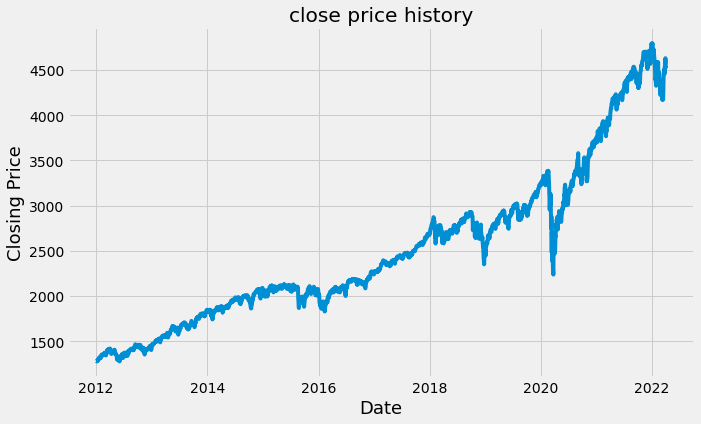

In [4]:
plt.figure(figsize=(10,6))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.show()

In [5]:
data = df['Close']
#convert datafram to array

dataset = data.values

#training testing dataset split
#math.ceil bring len to nearest integer
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

data.head()

Symbols,^GSPC
Date,
2012-01-03,1277.060059
2012-01-04,1277.300049
2012-01-05,1281.060059
2012-01-06,1277.810059
2012-01-09,1280.699951


In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data.shape

(2581, 1)

In [7]:
#create the training dataset

train_data = scaled_data[0: training_data_len]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()
                   


[array([0.00000000e+00, 6.81887298e-05, 1.13652507e-03, 2.13098451e-04,
       1.03420730e-03, 4.26762252e-03, 4.38128196e-03, 5.23936395e-03,
       3.41807280e-03, 4.71941621e-03, 8.80238115e-03, 1.06378580e-02,
       1.08878950e-02, 1.10640550e-02, 1.06804847e-02, 1.39224322e-02,
       1.17545092e-02, 1.11578058e-02, 1.02145052e-02, 1.00440334e-02,
       1.33626672e-02, 1.37746784e-02, 1.92754556e-02, 1.91134813e-02,
       1.98863447e-02, 2.07131417e-02, 2.12785602e-02, 1.86333161e-02,
       2.12274360e-02, 2.08665837e-02, 1.88009438e-02, 2.30089446e-02,
       2.39153067e-02, 2.41937498e-02, 2.29009733e-02, 2.45489139e-02,
       2.51967415e-02, 2.57223774e-02, 2.70265649e-02, 2.51797116e-02,
       2.75692306e-02, 2.63020163e-02, 2.47961067e-02, 1.88378823e-02,
       2.14717847e-02, 2.52450563e-02, 2.66543363e-02, 2.67168368e-02,
       3.37803360e-02, 3.33058590e-02, 3.56698159e-02, 3.61159214e-02,
       3.77013614e-02, 3.64994917e-02, 3.57522250e-02, 3.28796621e-02,
     

In [8]:
#convert x_train and y_train into array

x_train = np.array(x_train)
y_train = np.array(y_train)

#reshape the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2005, 60, 1)

In [9]:
#build LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
# compile the model

model.compile(optimizer='adam', loss ='mean_squared_error')


In [11]:
#train the model

model.fit(x_train, y_train, batch_size = 1, epochs=5)

Epoch 1/5
2005/2005 [==============================] - 25s 12ms/step - loss: 7.9809e-04
Epoch 2/5
2005/2005 [==============================] - 22s 11ms/step - loss: 2.5431e-04
Epoch 3/5
2005/2005 [==============================] - 22s 11ms/step - loss: 1.7792e-04
Epoch 4/5
2005/2005 [==============================] - 22s 11ms/step - loss: 1.7255e-04
Epoch 5/5
2005/2005 [==============================] - 22s 11ms/step - loss: 1.2144e-04


In [12]:
# create testing data set
# create a new array containing scaled values of the rest of the 20% data

test_data = scaled_data[training_data_len - 60:, :]
# create the data sets x_test and y_test

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [13]:
x_test = np.array(x_test)
y_test = np.array(y_test)
#reshape x_test
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))


In [14]:
#get y_predict

y_predict = model.predict(x_test)

y_predict = scaler.inverse_transform(y_predict)

In [15]:
# get rmse

rmse = np.sqrt(np.mean(y_predict - y_test) **2)

rmse

11.932679168937742

In [16]:
train = data[:training_data_len]
train.rename({'^GSPC': 'Close'}, axis=1, inplace=True)
valid = data[training_data_len:]
valid['Predictions'] = y_predict
valid.rename({'^GSPC': 'Close'}, axis=1, inplace=True)

c:\users\zvern\documents\python-workspace\frm1\venv\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\zvern\AppData\Local\Temp/ipykernel_4044/2497300937.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = y_predict


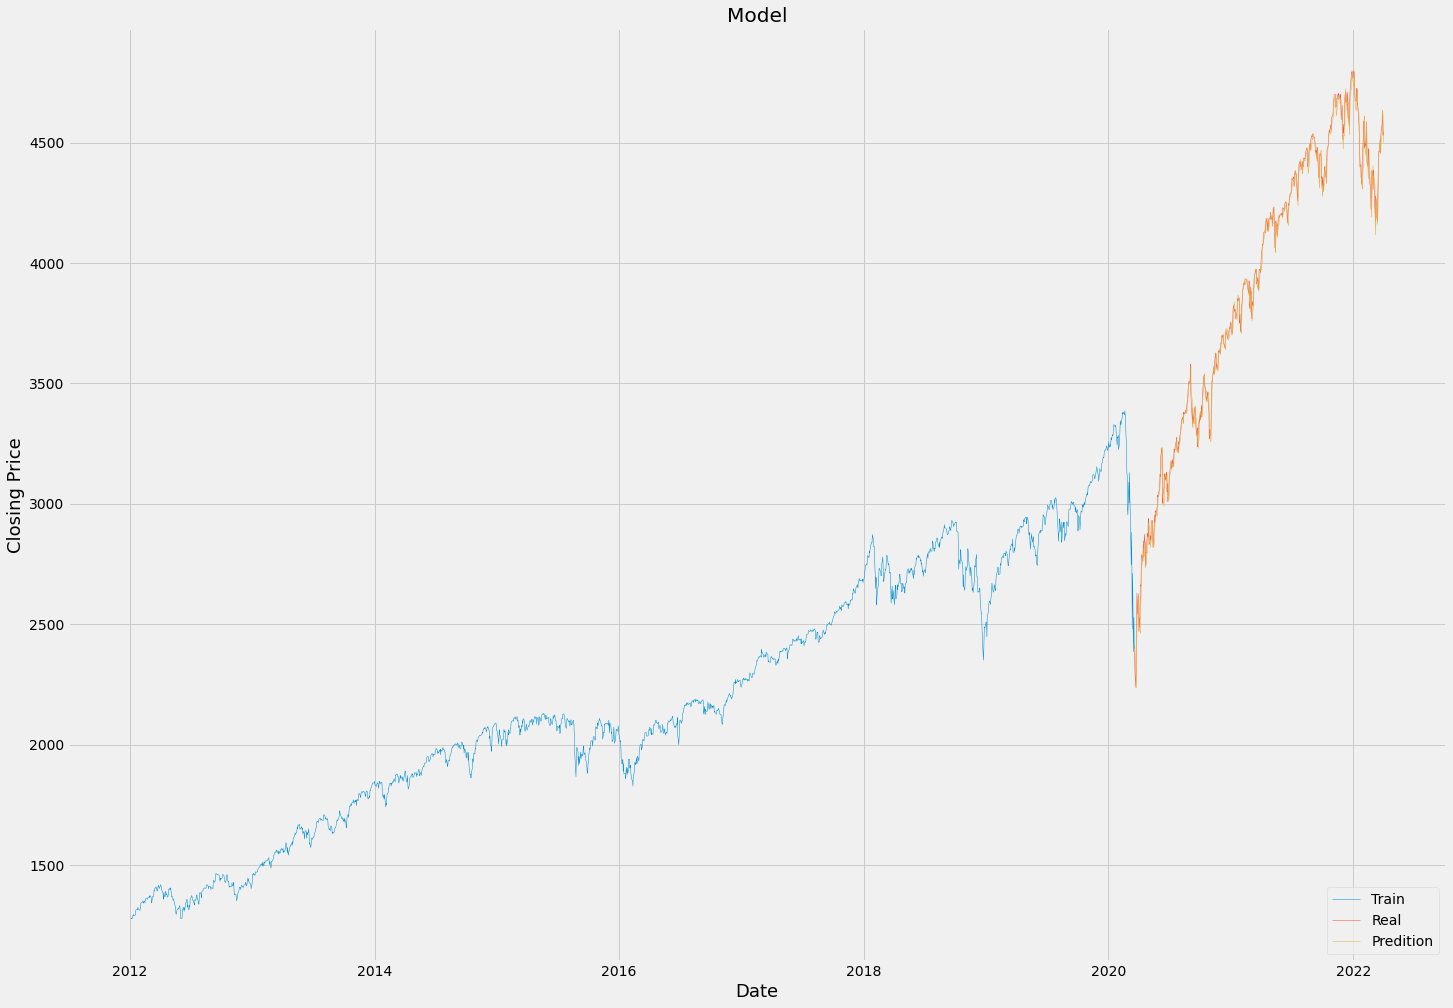

In [17]:
#plot
plt.figure(figsize = (22,16))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.plot(train, linewidth=0.5)
plt.plot(valid[['Close', 'Predictions']], linewidth=0.5)
plt.legend(['Train', 'Real', 'Predition'], loc = 'lower right')
plt.show()

In [18]:
#show real and predicted prices
valid

Symbols,Close,Predictions
Date,,
2020-03-19,2409.389893,2406.837402
2020-03-20,2304.919922,2388.062256
2020-03-23,2237.399902,2315.106201
2020-03-24,2447.330078,2235.713135
2020-03-25,2475.560059,2353.179199
...,...,...
2022-03-29,4631.600098,4575.140137
2022-03-30,4602.450195,4634.233887
2022-03-31,4530.410156,4612.175781


In [19]:
#prediction 

data2 = df['Close']

last_60days = data2[-60:].values

last_60_days_scaled = scaler.transform(last_60days)

X_test = np.array([last_60_days_scaled])
X_test = np.reshape(X_test, (X_test.shape[0], x_test.shape[1], 1))

predict_price = model.predict(X_test)
predict_price = scaler.inverse_transform(predict_price)
print(predict_price)

[[4514.1753]]
